In [1]:
# Import libraries
from bs4 import BeautifulSoup

import pandas as pd
import requests


In [7]:
# Functions 

def extract_data(gin_item):
    """Take a list item / gin item and extracts data from it.

    Args:
        gin_item (bs4.element.Tag): html list item.
    Returns:
        dict: key-value pairs of data extracted from the gin item. For example:
            {
                'brand': '#Gin (Hashtag Gin)',
                'distillery': 'O.H.S.O Brewery & Distillery',
                'href': 'https://theginisin.com/gin-reviews/hashtag-gin/',
                'rating': '2.5'
            }
    """
    data = {}
    h4_class = gin_item.find("h4")
    data["brand"] = h4_class.get("data-brand")
    data["distillery"] = h4_class.get("data-distillery")
    data["href"] = gin_item.find("a", {"class": "distill-link"}).get("href")
    data["rating"] = gin_item.find("span", {"class": "rating"}).get("data-score")

    return data

In [2]:
# The base url from where we're going to extract gins
BASE_URL = "https://theginisin.com/gin-reviews-list/"

In [3]:
# Extract page content from our BASE_URL
page = requests.get(BASE_URL)
soup = BeautifulSoup(page.content, 'html.parser')

# Find the review-list div and gathe all list items
gin_review_list = soup.find("div", {"id": "review-list"})
gin_items = gin_review_list.find_all("li")


In [8]:
# Create a DataFrame with information from our gin list
data = [extract_data(gin) for gin in gin_items]
df = pd.DataFrame(data)


In [5]:
df.head(10)

,brand,distillery,href,rating
0,#Gin (Hashtag Gin),O.H.S.O Brewery & Distillery,https://theginisin.com/gin-reviews/hashtag-gin/,2.5
1,100 Mill St. Gin,100 Mill St Distillers,https://theginisin.com/gin-reviews/100-mill-st...,4.5
2,100 Mill St. Gin Lumberjack ‘n Jill Edition,,https://theginisin.com/gin-reviews/100-mill-st...,4
3,1897 Quinine Gin,Maverick Drinks,https://theginisin.com/gin-reviews/1897-quinin...,3
4,269 Gin,Round Barn Distillery,https://theginisin.com/gin-reviews/269-gin/,3
5,3 Queens Gin,Doire Distiling,https://theginisin.com/gin-reviews/3-queens-gin/,3.5
6,4312 Gin,,https://theginisin.com/gin-reviews/4312-gin/,4
7,50 Fathoms Gin,Port Chilkoot Distillery,https://theginisin.com/gin-reviews/50-fathoms-...,4.5
8,6 o’clock Gin,,https://theginisin.com/gin-reviews/6-oclock-gin/,4
9,Abernathy Gin,Tenn South Distillery,https://theginisin.com/gin-reviews/abernathy-gin/,3


<AxesSubplot:>

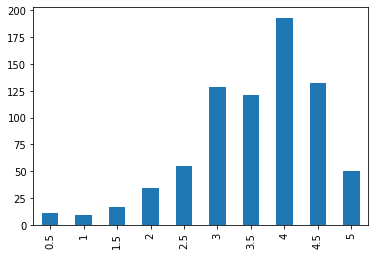

In [6]:
df['rating'].value_counts().sort_index().plot(kind = "bar")